In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['figure.dpi'] = 200
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load the dataset 
df = pd.read_excel("https://raw.githubusercontent.com/snehuuu28/Excelr_Data_Science/main/Assignments/Assignment_13/heart_disease.xlsx", sheet_name=1)

In [3]:
# Display the dataset to understand its structure
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [4]:
# Check the shape, info and description to understand the structure of data

In [5]:
df.shape  # Returns number of rows and columns

(908, 13)

In [6]:
df.info()  # Check for data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
df.describe()  # Summary statistics for numerical columns

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [8]:
# Checking for missing values in the dataset
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

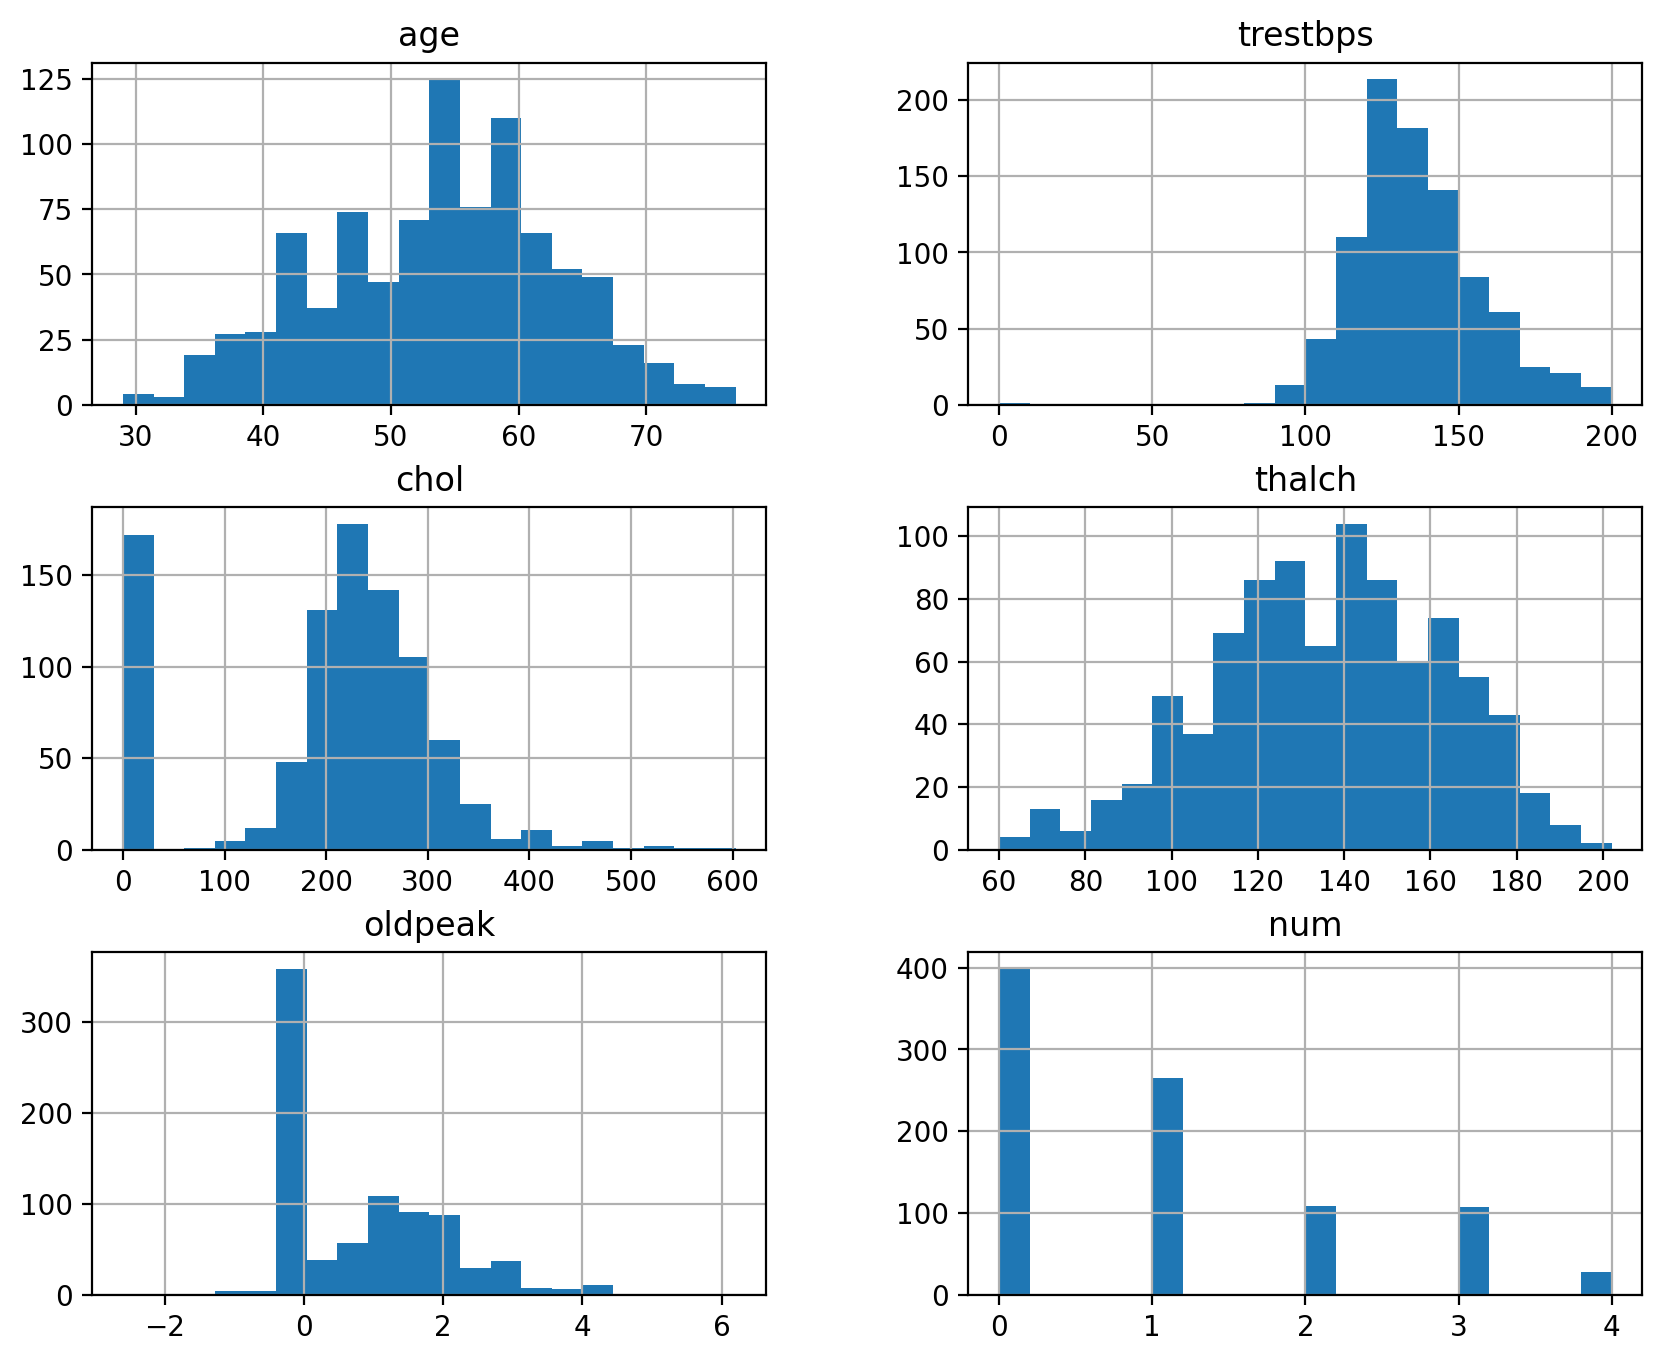

In [9]:
# Visualizing the distributions of numerical columns using histograms
df.hist(bins=20, figsize=(10, 8))
plt.show()

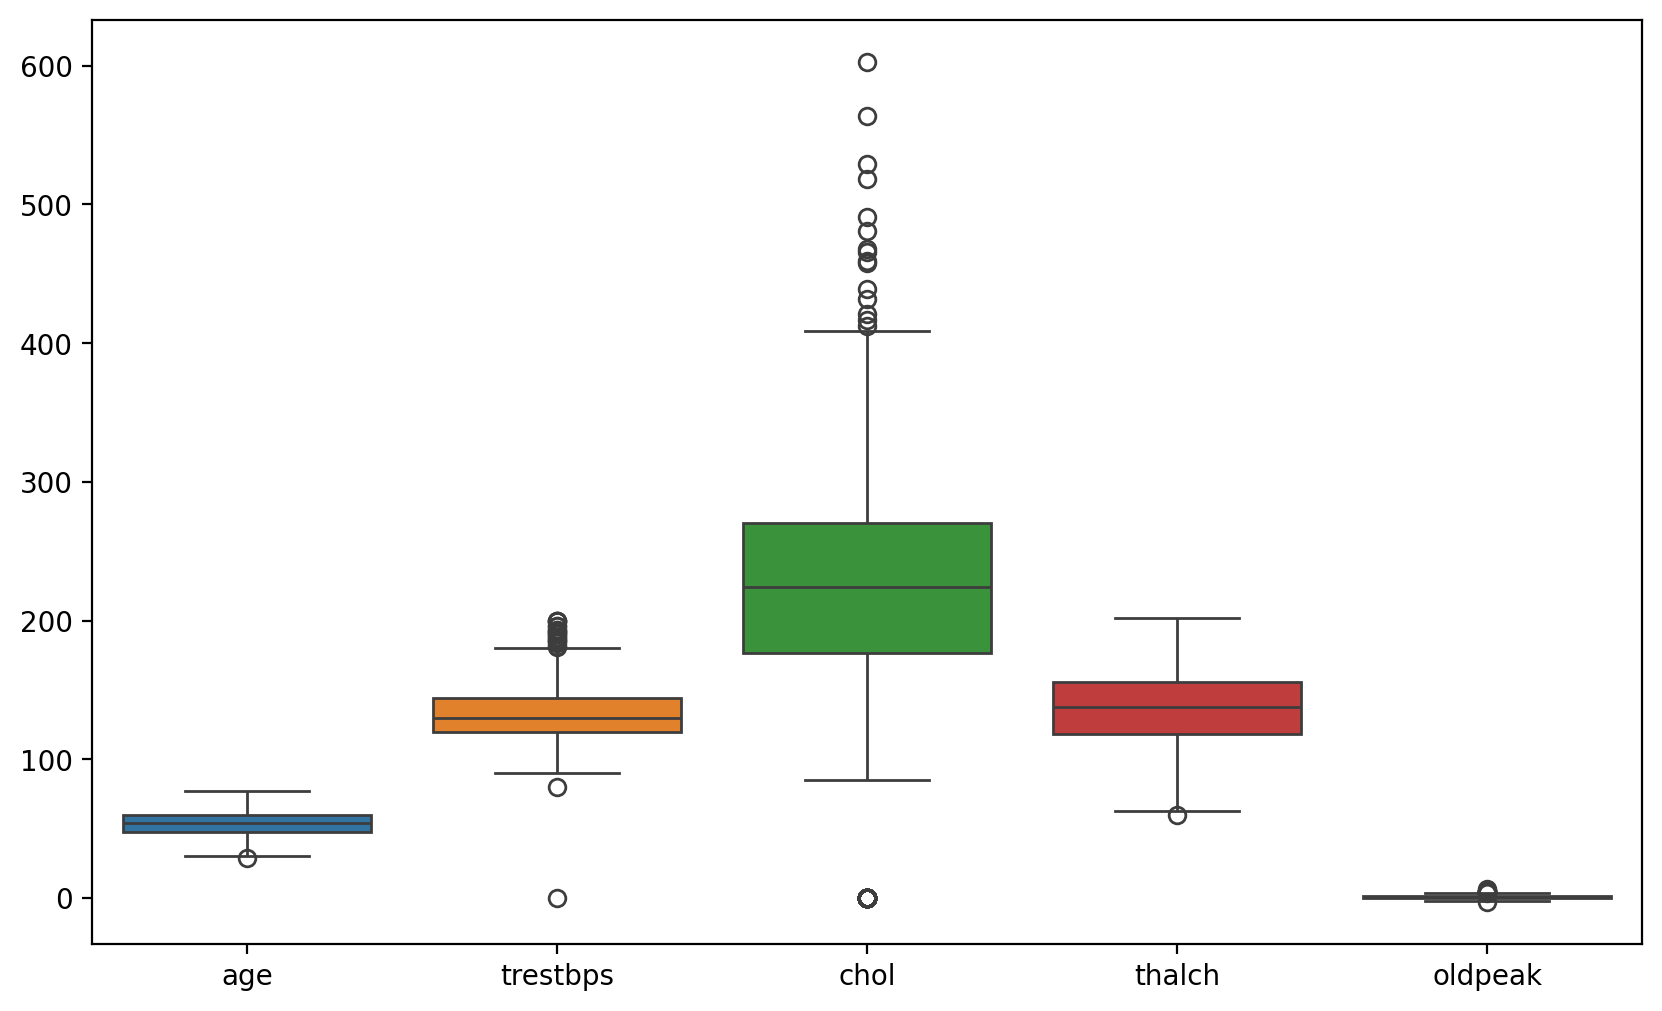

In [10]:
# Box plot to check for outliers in numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']])
plt.show()

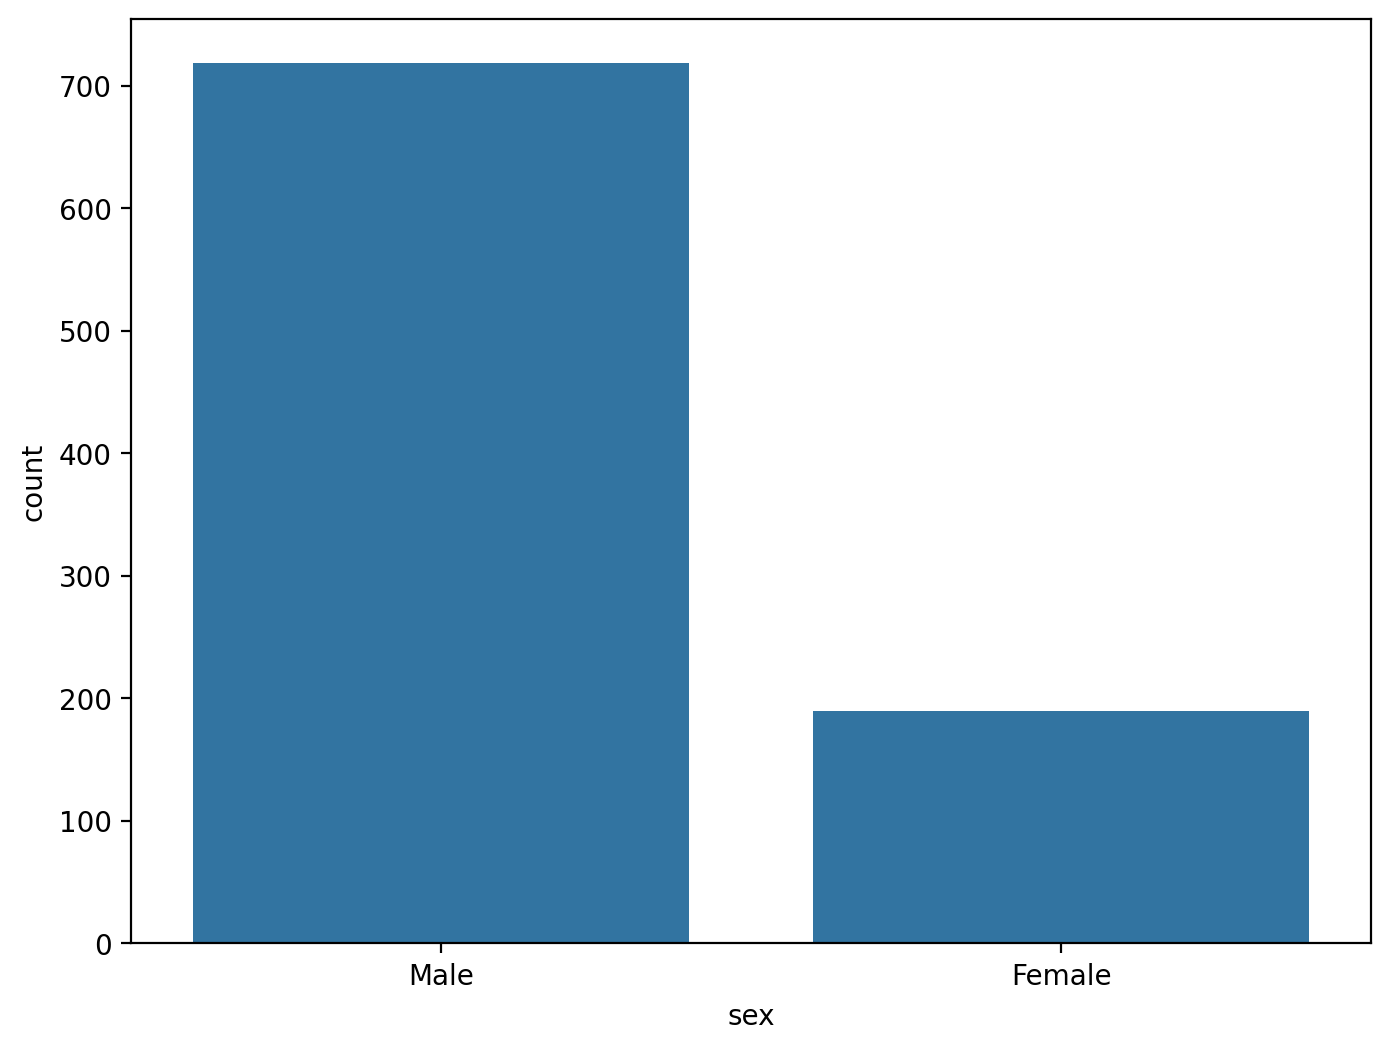

In [11]:
# Count plot for categorical features like 'sex'
sns.countplot(x='sex', data=df)
plt.show()

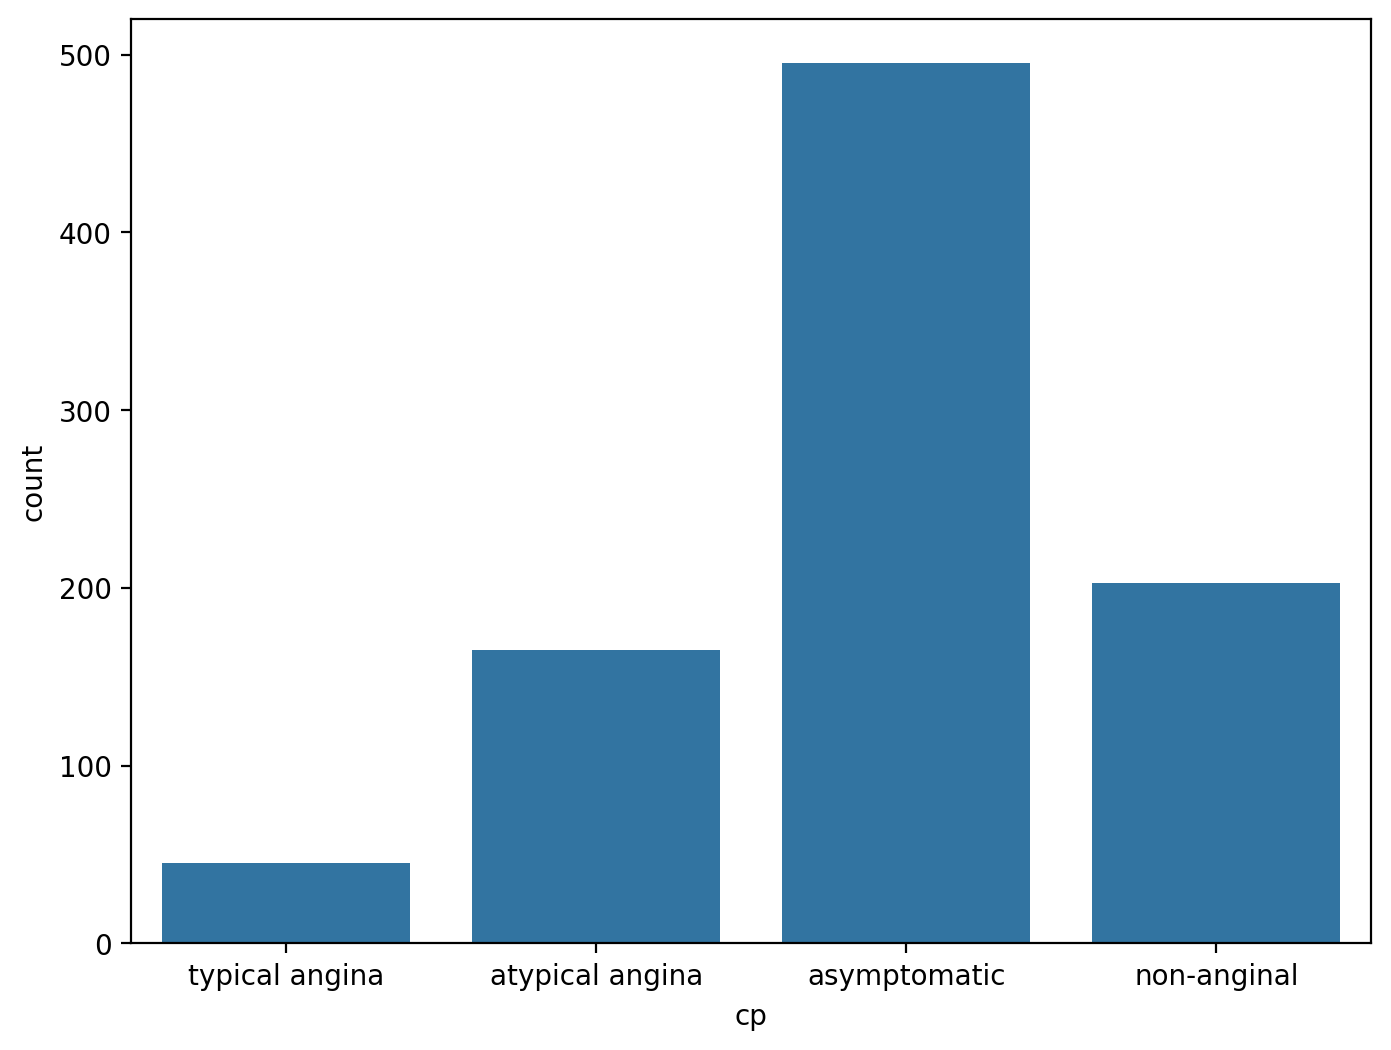

In [12]:
# Count plot for other categorical features like 'cp'
sns.countplot(x='cp', data=df)
plt.show()

In [13]:
# Handling missing values in 'oldpeak' column by replacing with the median
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [14]:
# Encoding categorical features using LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [15]:
# Initialize LabelEncoder
le = LabelEncoder()

In [16]:
# Encoding categorical columns with LabelEncoder
df['sex'] = le.fit_transform(df['sex'])
df['cp'] = le.fit_transform(df['cp'])
df['restecg'] = le.fit_transform(df['restecg'])
df['slope'] = le.fit_transform(df['slope'])
df['thal'] = le.fit_transform(df['thal'])

In [17]:
# Replace any invalid or misspelled values like 'TURE' with 'TRUE'
df['exang'] = df['exang'].replace({'TURE': 'TRUE'})

# Replace string values with boolean True/False
df['exang'] = df['exang'].replace({'TRUE': True, 'FALSE': False})

# Convert boolean columns to integers (0 for False, 1 for True)
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)


In [18]:
# Checking the dataset after encoding
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,2,4
905,56,1,2,170,0,0,0,123,1,2.5,0,1,4
906,56,1,2,144,208,1,2,105,1,0.5,0,0,4


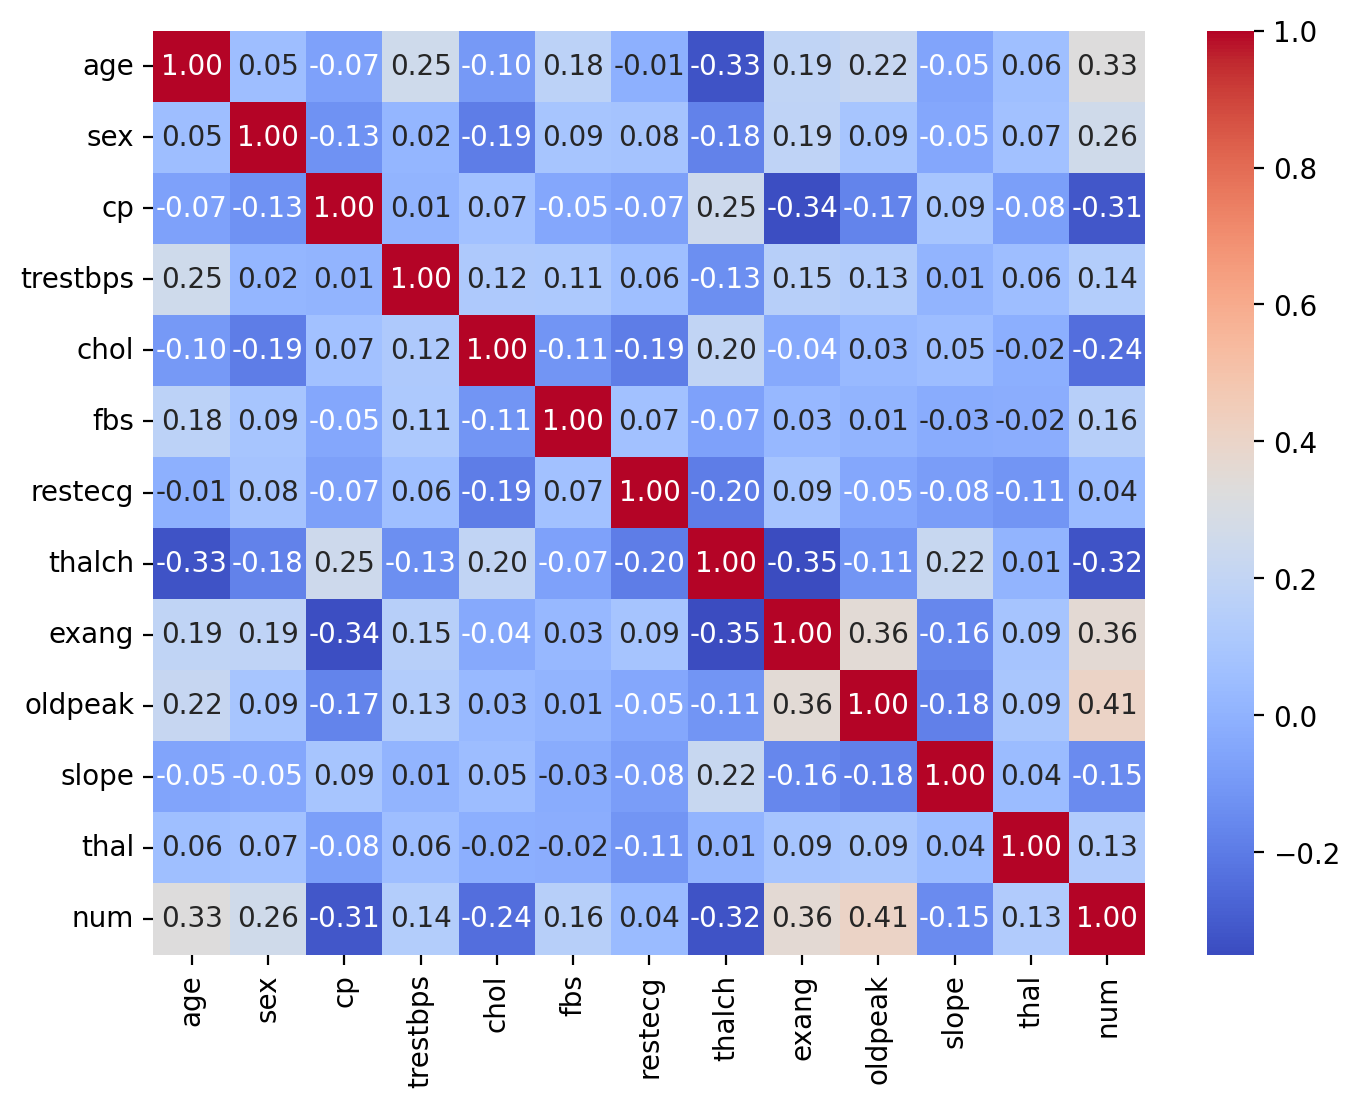

In [19]:
# Correlation matrix to check relationships between features
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [20]:
# Checking the data types after the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    int32  
 2   cp        908 non-null    int32  
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    int32  
 6   restecg   908 non-null    int32  
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    int32  
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    int32  
 11  thal      908 non-null    int32  
 12  num       908 non-null    int64  
dtypes: float64(1), int32(7), int64(5)
memory usage: 67.5 KB


In [21]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
numerical_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [22]:
# Now, preparing the features and target variable for training
# Here, we are assuming that 'num' is the target variable.
x = df.drop('num', axis=1)  # Features (all columns except 'num')
y = df['num']  # Target variable (num)

In [23]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,0.567394,0.281297,1,0,0.524183,0,1.354403,0,0,0
1,41,1,1,0.076967,0.013526,0,1,-0.147705,0,-0.815718,1,0,0
2,57,1,0,0.322181,-0.084656,0,1,0.449529,0,-0.438305,1,0,0
3,52,1,3,-0.756760,-0.138211,0,0,2.017268,0,-0.815718,1,0,0
4,57,1,0,-1.149102,-0.004325,0,1,-0.371668,1,0.599578,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,-0.413461,-1.798388,0,1,-0.595631,0,0.599578,2,2,4
904,62,1,0,1.597292,-0.281021,0,2,-0.595631,1,2.014874,1,2,4
905,56,1,2,1.793463,-1.798388,0,0,-0.483649,1,1.543109,0,1,4
906,56,1,2,0.518352,0.058155,1,2,-1.155538,1,-0.343952,0,0,4


In [24]:
# Splitting the data into training and testing sets (80-20 split)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
#Define the model with pruning parameters
dt = DecisionTreeClassifier(
    max_depth=5,               # Limit tree depth to 5
    min_samples_split=10,      # Require at least 10 samples to split a node
    min_samples_leaf=5,        # Require at least 5 samples in each leaf node
    criterion='gini',          # Use Gini impurity (alternatively 'entropy')
    random_state=42
)

In [26]:
# Train the model
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [27]:
# Predict on the test set
ypred = dt.predict(xtest)
ypred

array([1, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1,
       1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 3,
       1, 1, 2, 1, 1, 0], dtype=int64)

In [28]:
# Check feature importances to understand the significance of each feature
dt.feature_importances_

array([0.12248578, 0.04005851, 0.37835607, 0.04971652, 0.16895946,
       0.        , 0.016336  , 0.05309941, 0.08295637, 0.04771252,
       0.        , 0.04031936])

In [29]:
# Model evaluation using classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
# Print classification report for precision, recall, f1-score
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77        89
           1       0.38      0.54      0.44        48
           2       0.21      0.14      0.17        22
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         6

    accuracy                           0.55       182
   macro avg       0.27      0.30      0.28       182
weighted avg       0.49      0.55      0.52       182



In [31]:
# Display confusion matrix to evaluate model performance
confusion_matrix(ytest, ypred)

array([[72, 15,  2,  0,  0],
       [18, 26,  4,  0,  0],
       [ 1, 16,  3,  2,  0],
       [ 6,  7,  4,  0,  0],
       [ 0,  5,  1,  0,  0]], dtype=int64)

In [32]:
# Check the accuracy of the model on both the training and testing sets
print('Training accuracy: ', dt.score(xtrain, ytrain))
print('Testing Accuracy: ', dt.score(xtest, ytest))

Training accuracy:  0.6253443526170799
Testing Accuracy:  0.554945054945055


In [33]:
# Check unique values in the 'num' column (target variable)
df['num'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [34]:
# Display the trained decision tree classifier
dt

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

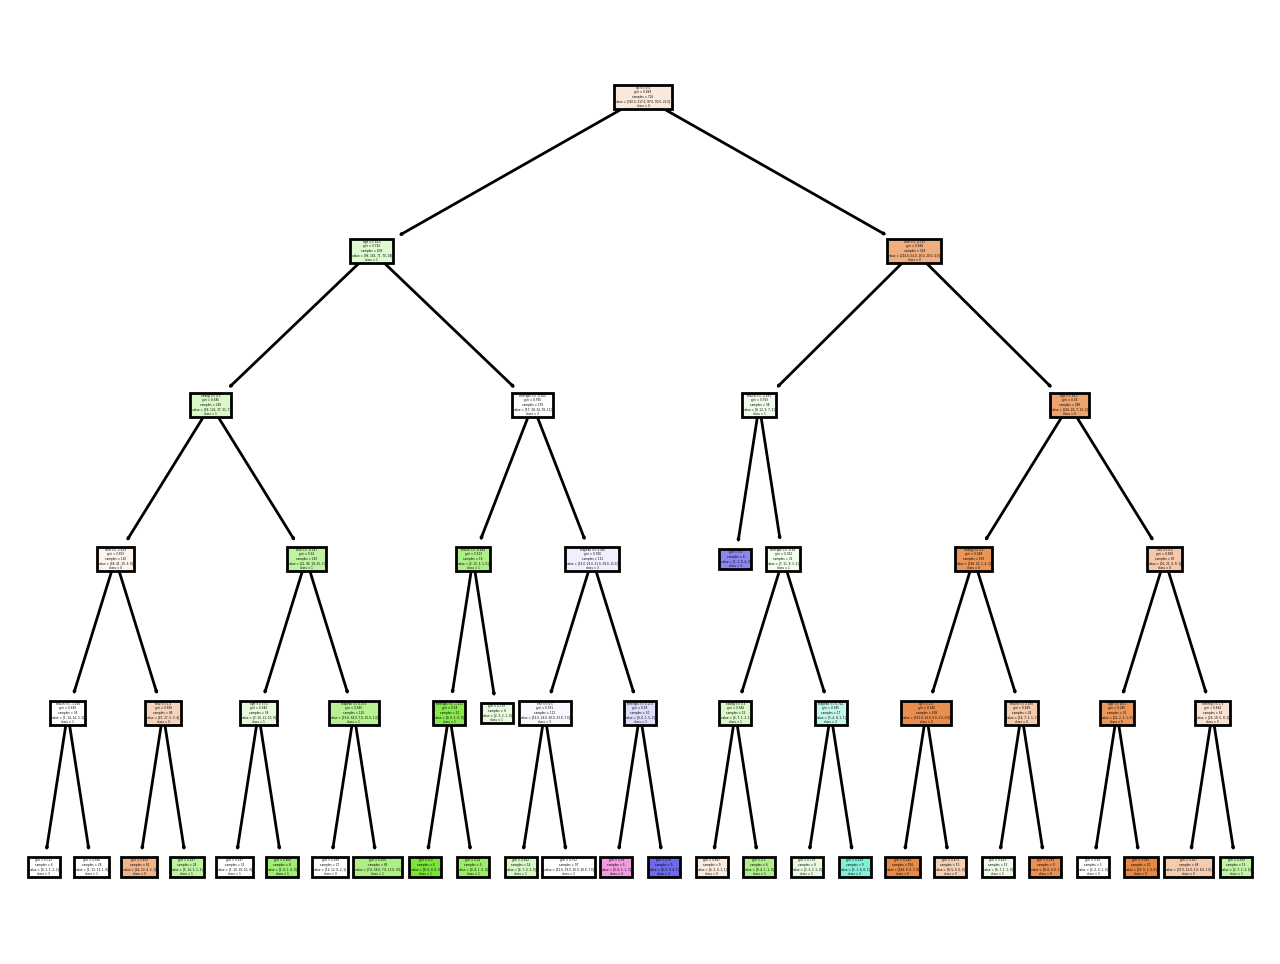

In [35]:
# Visualize the decision tree
# Since the target variable 'num' appears to have multiple classes (0, 1, 2, 3, 4),
# we update the class names in the plot accordingly.

tree.plot_tree(dt, 
               feature_names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal'],
               class_names=['0', '1', '2', '3', '4'],  # Update class names to match your target variable
               filled=True)

# Show the decision tree plot
plt.show()

In [36]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
# Set the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [39]:
# Create the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

In [40]:
# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [41]:
# Get the best model and evaluate
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Training score: {best_model.score(xtrain, ytrain)}")
print(f"Testing score: {best_model.score(xtest, ytest)}")

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Training score: 0.6253443526170799
Testing score: 0.554945054945055


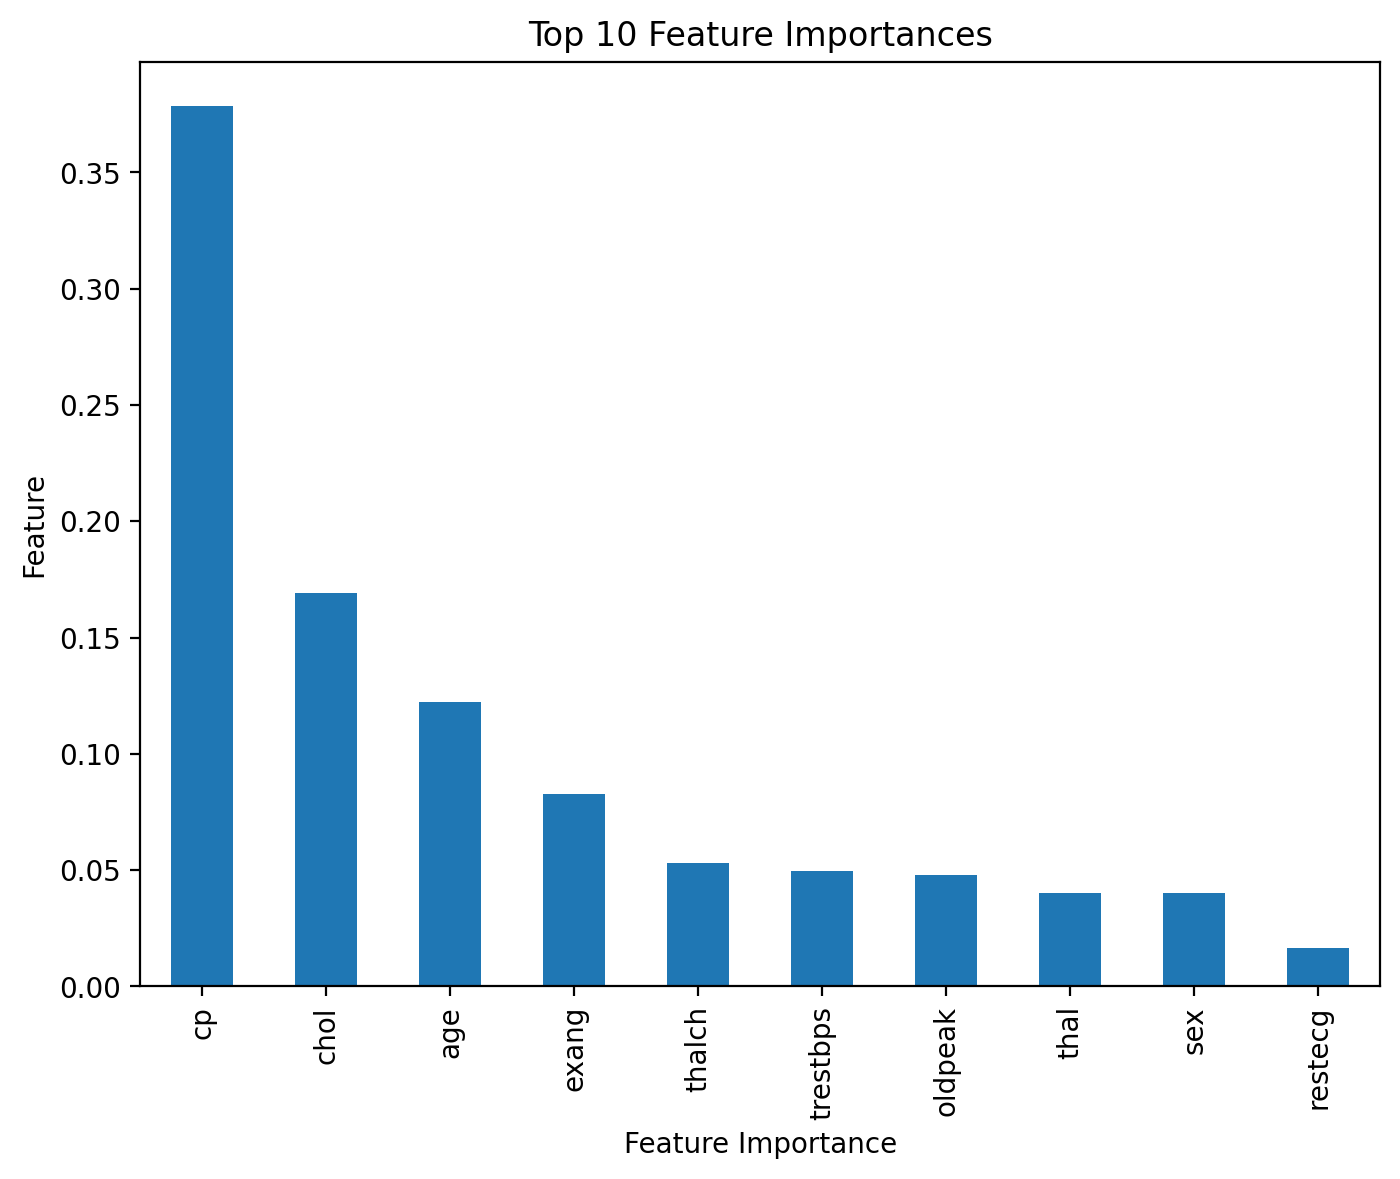

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the best model
feature_importances = pd.Series(best_model.feature_importances_, index=x.columns)

# Plot the top 10 most important features as a vertical bar chart
feature_importances.nlargest(10).plot(kind='bar')

# Set the title for the plot
plt.title("Top 10 Feature Importances")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")

# Show the plot
plt.show()


In [43]:
# Drop features with low importance
low_importance_features = ['restecg','sex']#,'thal','oldpeak','trestbps']
df_reduced = df.drop(columns=low_importance_features)

In [44]:
# Split the data again
x = df_reduced.drop('num', axis=1)  # Features
y = df_reduced['num']  # Target variable

In [45]:
x

,age,cp,trestbps,chol,fbs,thalch,exang,oldpeak,slope,thal
0,63,3,0.567394,0.281297,1,0.524183,0,1.354403,0,0
1,41,1,0.076967,0.013526,0,-0.147705,0,-0.815718,1,0
2,57,0,0.322181,-0.084656,0,0.449529,0,-0.438305,1,0
3,52,3,-0.756760,-0.138211,0,2.017268,0,-0.815718,1,0
4,57,0,-1.149102,-0.004325,0,-0.371668,1,0.599578,1,0
...,...,...,...,...,...,...,...,...,...,...
903,53,0,-0.413461,-1.798388,0,-0.595631,0,0.599578,2,2
904,62,0,1.597292,-0.281021,0,-0.595631,1,2.014874,1,2
905,56,2,1.793463,-1.798388,0,-0.483649,1,1.543109,0,1
906,56,2,0.518352,0.058155,1,-1.155538,1,-0.343952,0,0


In [46]:
# Split the data into training and testing sets (80-20 split)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
# Train the Decision Tree model again
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [48]:
# Predict and evaluate the performance
ypred = dt.predict(xtest)

In [49]:
# Predict and evaluate the performance
ypred = dt.predict(xtest)

In [50]:
print(f"Training score: {dt.score(xtrain, ytrain)}")
print(f"Testing score: {dt.score(xtest, ytest)}")

Training score: 0.6308539944903582
Testing score: 0.554945054945055


In [51]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(dt, x, y, cv=5)  # 5-fold cross-validation

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")

Cross-validation scores: [0.45604396 0.47802198 0.43956044 0.5359116  0.53038674]
Mean CV score: 0.487984943233562


In [52]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_classifier.fit(xtrain, ytrain)

# Evaluate the Random Forest model
print(f"Random Forest Training score: {rf_classifier.score(xtrain, ytrain)}")
print(f"Random Forest Testing score: {rf_classifier.score(xtest, ytest)}")

Random Forest Training score: 0.6763085399449036
Random Forest Testing score: 0.5824175824175825
